In [63]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import networkx as nx

from lib import TestNetworks as tn
from lib import DigraphConvert as dc

#Read in the control range data as a dictionary keyed by node
import csv
control_range = {}
with open("./dat/SMCR_Result.txt") as csvfile:
    cr_file = csv.reader(csvfile, delimiter='\t', quotechar='|')
    for row in cr_file:
        control_range[int(row[0])] = int(row[1])

#C elegans network; the global thing we want to play with
G = tn.testNet(100)
G = dc.CelegansLabelConvert(G)
nx.set_node_attributes(G,'control_range',control_range)

node_nums = range(0,G.number_of_nodes())
nx.set_node_attributes(G,'node_label',{i: i for i in node_nums})
Gn = G.nodes(data=True)

#Get lists of neuron types
senseList = [d for n,d in G.nodes_iter(data=True) if 'sensory' in d['type']]
senseOnlyList = [d for n,d in G.nodes_iter(data=True) if 'sensory'==d['type']]
motorList = [d for n,d in G.nodes_iter(data=True) if 'motor' in d['type']]
motorOnlyList = [d for n,d in G.nodes_iter(data=True) if 'motor'==d['type']]
interList = [d for n,d in G.nodes_iter(data=True) if 'inter' in d['type']]
interOnlyList = [d for n,d in G.nodes_iter(data=True) if 'inter'==d['type']]

typeDicts = {'sense':senseList, 'sense_only':senseOnlyList,
             'motor':motorList, 'motor_only':motorOnlyList, 
             'inter':interList, 'inter_only':interOnlyList}

# Plotting control range of neuron categories
Also a little widget

In [88]:
import pprint

def neuronData(node_num,verbose = False):
    '''
    Print simple information about a neuron
    '''
    if type(node_num)==int:
        this_node = [dat for num,dat in G.nodes_iter(data=True) if(dat['node_label']==node_num)][0]
    elif type(node_num)==str:
        this_node = [dat for num,dat in G.nodes_iter(data=True) if(dat['name']==node_num)][0]
    else:
        raise ValueError()
    if not verbose:
        print("Neuron number",node_num,"is called",this_node['name'])
        print("This neuron is of type:",this_node['type'])
        print("The control range is",this_node['control_range'])
    else:
        pprint.pprint(this_node)
    
    print("******************************************************************************")
    
node_widget = widgets.BoundedIntText(
    value=7,
    min=0,
    max=G.number_of_nodes()-1,
    step=1,
    description='Text:',
    disabled=False
)
interact(neuronData,node_num=node_widget);

Neuron number 7 is called VA11
This neuron is of type: motor
The control range is 95
******************************************************************************


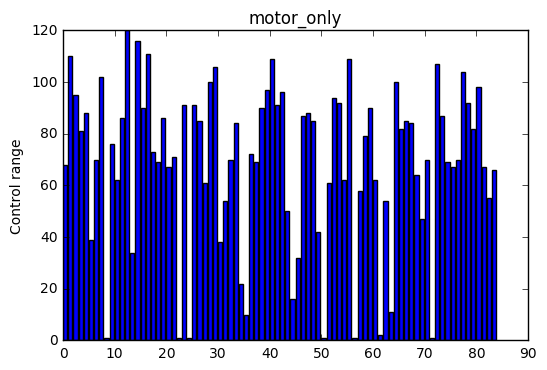

The mean control range for neurons of type motor_only is 69.35714285714286
The max control range for neurons of type motor_only is 120
The min control range for neurons of type motor_only is 1


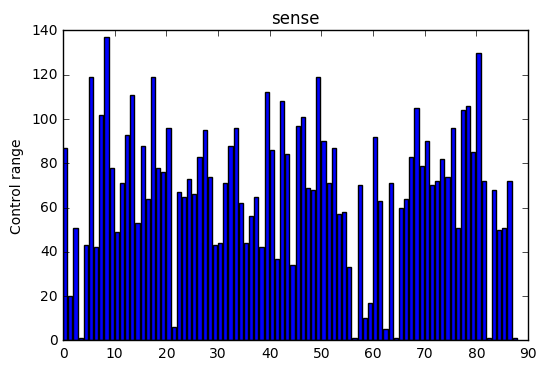

The mean control range for neurons of type sense is 68.4659090909091
The max control range for neurons of type sense is 137
The min control range for neurons of type sense is 1


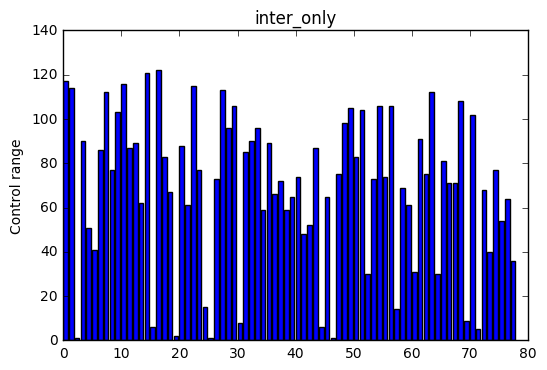

The mean control range for neurons of type inter_only is 69.7051282051282
The max control range for neurons of type inter_only is 122
The min control range for neurons of type inter_only is 1


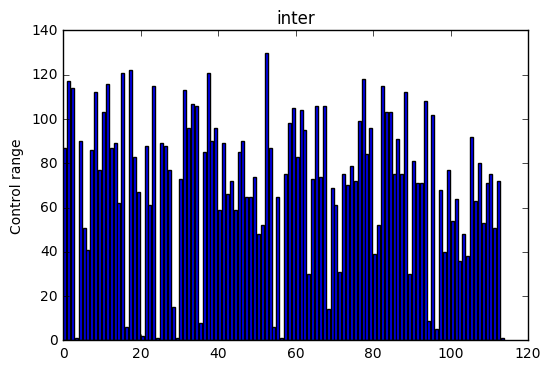

The mean control range for neurons of type inter is 72.09649122807018
The max control range for neurons of type inter is 130
The min control range for neurons of type inter is 1


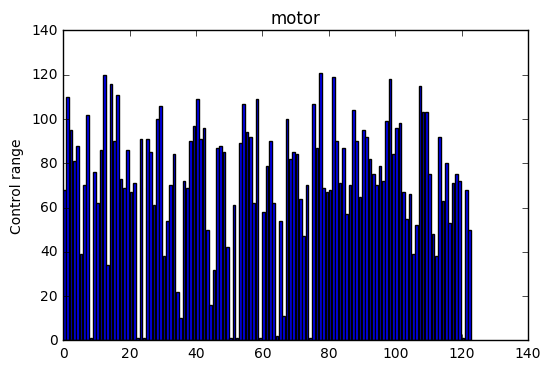

The mean control range for neurons of type motor is 71.35772357723577
The max control range for neurons of type motor is 121
The min control range for neurons of type motor is 1


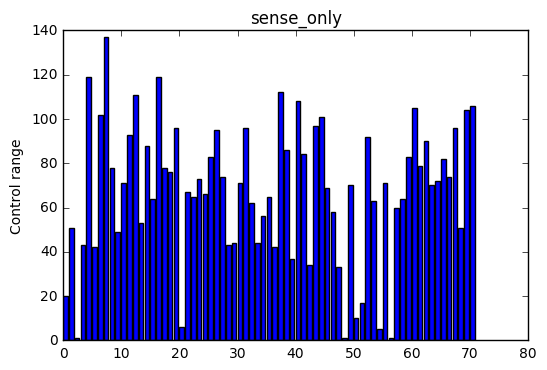

The mean control range for neurons of type sense_only is 68
The max control range for neurons of type sense_only is 137
The min control range for neurons of type sense_only is 1


In [65]:
import matplotlib.pyplot as plt
import statistics as stat

CRDat = {}
for thisType in typeDicts.keys():
    thisList = typeDicts[thisType]
    CRDat[thisType] = [ neuron['control_range'] for neuron in thisList ]
    
    plt.bar(range(0,len(thisList)),CRDat[thisType])
    plt.ylabel('Control range')
    plt.title(thisType)
    plt.show()
    
    print("The mean control range for neurons of type",thisType,"is",stat.mean(CRDat[thisType]))
    print("The max control range for neurons of type",thisType,"is",max(CRDat[thisType]))
    print("The min control range for neurons of type",thisType,"is",min(CRDat[thisType]))
    
    

# Sorting neurons by control range

Legend entry: motor, inter is k
Legend entry: sensory, motor is k
Legend entry: sensory, inter is k
Legend entry: motor is b
Legend entry: sensory is r
Legend entry: inter is g


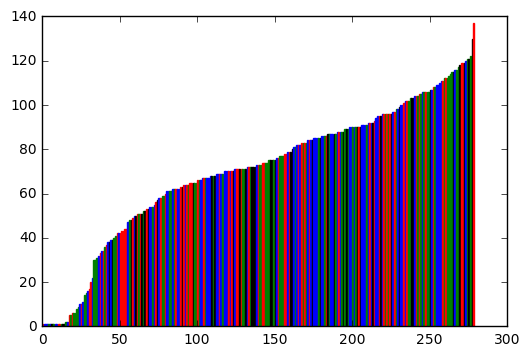

In [69]:
import matplotlib.pyplot as plt

sortedNodes = sorted([d for n,d in Gn], key=lambda k: k['control_range']) 

barlist = plt.bar(range(0,len(sortedNodes)),[d['control_range'] for d in sortedNodes])

colorDict = {'sensory':'r','motor':'b','inter':'g','motor, inter':'k','sensory, motor':'k','sensory, inter':'k'}
for i in range(0,len(barlist)):
    barlist[i].set_color(colorDict[sortedNodes[i]['type']])
#plt.legend(
for thisType in colorDict:
    print("Legend entry:",thisType,"is",colorDict[thisType])
plt.show()

In [89]:
#Display information about TOP 10 control range neurons
numNodes = len(sortedNodes)-1
for i in range(numNodes,numNodes-10,-1):
    neuronData(sortedNodes[i]['node_label'],verbose=True)

{'AYGanglionDesignation': 'C',
 'AYNbr': 46,
 'D': 29,
 'SomaPosition': 0.14,
 'SomaRegion': 'H',
 'control_range': 137,
 'functions': 'Dauer formation (entry or exit) (Bargmann and Horvitz, 1991). '
              'Positive chemotaxis to water-soluble attractants (Bargmann, '
              '2006; Bergamasco and Bazzicalupo, 2006).',
 'group': 'ADF',
 'inD': 11,
 'kx': 0.083279,
 'ky': -0.0031842,
 'link': 'http://www.wormatlas.org/neurons/Individual%20Neurons/ADFframeset.html',
 'modalities': 'chemo',
 'name': 'ADFR',
 'neuronLabel': 283,
 'node_label': 51,
 'organ': 'amphid',
 'outD': 18,
 'type': 'sensory'}
******************************************************************************
{'AYGanglionDesignation': 'K',
 'AYNbr': 220,
 'D': 43,
 'SomaPosition': 0.82,
 'SomaRegion': 'T',
 'control_range': 130,
 'group': 'PVR',
 'inD': 15,
 'kx': -0.99451,
 'ky': -0.038694,
 'link': 'http://www.wormatlas.org/neurons/Individual%20Neurons/PVRframeset.html',
 'modalities': 'proprio',
 'name': 

In [90]:
#Display information about BOTTOM 10 control range neurons
for i in range(0,10):
    neuronData(sortedNodes[i]['node_label'],verbose=True)

{'AYGanglionDesignation': 'A',
 'AYNbr': 37,
 'D': 17,
 'SomaPosition': 0.09,
 'SomaRegion': 'H',
 'control_range': 1,
 'group': 'URY',
 'inD': 3,
 'kx': 0.1215,
 'ky': 0.0022136,
 'link': 'http://www.wormatlas.org/neurons/Individual%20Neurons/URYframeset.html',
 'name': 'URYVL',
 'neuronLabel': 514,
 'node_label': 3,
 'outD': 14,
 'type': 'sensory'}
******************************************************************************
{'AYGanglionDesignation': 'G',
 'AYNbr': 253,
 'D': 17,
 'SomaPosition': 0.5,
 'SomaRegion': 'M',
 'control_range': 1,
 'group': 'VA',
 'inD': 7,
 'kx': -0.44564,
 'ky': 0.042732,
 'link': 'http://www.wormatlas.org/neurons/Individual%20Neurons/VAframeset.html',
 'name': 'VA6',
 'neuronLabel': 524,
 'node_label': 13,
 'outD': 10,
 'type': 'motor'}
******************************************************************************
{'AYGanglionDesignation': 'G',
 'AYNbr': 265,
 'D': 27,
 'SomaPosition': 0.61,
 'SomaRegion': 'M',
 'control_range': 1,
 'group': 'VB',
 'in

In [84]:
interact(neuronData,node_num="PLMR");

{'AYGanglionDesignation': 'C',
 'AYNbr': 46,
 'D': 29,
 'SomaPosition': 0.14,
 'SomaRegion': 'H',
 'control_range': 137,
 'functions': 'Dauer formation (entry or exit) (Bargmann and Horvitz, 1991). '
              'Positive chemotaxis to water-soluble attractants (Bargmann, '
              '2006; Bergamasco and Bazzicalupo, 2006).',
 'group': 'ADF',
 'inD': 11,
 'kx': 0.083279,
 'ky': -0.0031842,
 'link': 'http://www.wormatlas.org/neurons/Individual%20Neurons/ADFframeset.html',
 'modalities': 'chemo',
 'name': 'ADFR',
 'neuronLabel': 283,
 'node_label': 51,
 'organ': 'amphid',
 'outD': 18,
 'type': 'sensory'}
